#Setup 

In [ ]:
if (!require("igraph")) install.packages("igraph")
library ("igraph")
if (!require("clevr")) install.packages("clevr")
library ("clevr")

Loading required package: igraph

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘igraph’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Attaching package: ‘igraph’


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union


Loading required package: clevr

Warning message in library(package, lib.loc = lib.loc, character.only = TRUE, logical.return = TRUE, :
“there is no package called ‘clevr’”
Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘Rcpp’, ‘BH’




In [ ]:
unzip('finance_data.zip')

In [ ]:
path = "finance_data/data/"
out.file<-""
file.names <- dir(path, pattern =".csv")
m <- matrix(, nrow = 0, ncol = 765)
sectors.table <- read.table("finance_data/Name_sector.csv",header=TRUE, sep=",", stringsAsFactors=TRUE)
sectors = c()
sectors.names <- c()
for(i in 1:length(file.names)){
    file <- read.table(paste("finance_data/data/",file.names[i],sep = ""),header=TRUE, sep=",", stringsAsFactors=FALSE)
    if(length(file$Close)==765){
        m <- rbind(m, matrix(file$Close, nrow=1, ncol=765))
        mystr <- substr(file.names[i], 1, nchar(file.names[i])-4)
        sector <- sectors.table$Sector[which(sectors.table$Symbol == mystr)]
#         print(sector)
#        sectors = c(sectors, as.factor(sector))
        sectors.names = c(sectors.names, toString(sector))
    }
}
com_num = length(sectors.names)
data_num = ncol(m)
sector.set<-as.factor(sectors.names)
sectors.index<-as.numeric(sector.set)
num_sector <- length(unique(sectors.index))
table(sector.set)

sector.set
    Consumer Discretionary           Consumer Staples 
                        84                         36 
                    Energy                 Financials 
                        34                         63 
               Health Care                Industrials 
                        60                         64 
    Information Technology                  Materials 
                        66                         24 
               Real Estate Telecommunication Services 
                        31                          4 
                 Utilities 
                        28 

In [ ]:
# symbols of each company
sectors.table$Symbol

[1] A     AAL   AAP   AAPL  ABBV  ABC   ABT   ACN   ADBE  ADI   ADM   ADP  
 [13] ADS   ADSK  AEE   AEP   AES   AET   AFL   AGN   AIG   AIV   AIZ   AJG  
 [25] AKAM  ALB   ALK   ALL   ALLE  ALXN  AMAT  AMD   AME   AMG   AMGN  AMP  
 [37] AMT   AMZN  AN    ANTM  AON   APA   APC   APD   APH   ARE   ARNC  ATVI 
 [49] AVB   AVGO  AVY   AWK   AXP   AYI   AZO   BA    BAC   BAX   BBBY  BBT  
 [61] BBY   BCR   BDX   BEN   BF.B  BHI   BIIB  BK    BLK   BLL   BMY   BRK.B
 [73] BSX   BWA   BXP   C     CA    CAG   CAH   CAT   CB    CBG   CBOE  CBS  
 [85] CCI   CCL   CELG  CERN  CF    CFG   CHD   CHK   CHRW  CHTR  CI    CINF 
 [97] CL    CLX   CMA   CMCSA CME   CMG   CMI   CMS   CNC   CNP   COF   COG  
[109] COH   COL   COO   COP   COST  COTY  CPB   CRM   CSCO  CSRA  CSX   CTAS 
[121] CTL   CTSH  CTXS  CVS   CVX   CXO   D     DAL   DD    DE    DFS   DG   
[133] DGX   DHI   DHR   DIS   DISCA DISCK DISH  DLPH  DLR   DLTR  DOV   DOW  
[145] DPS   DRI   DTE   DUK   DVA   DVN   DXC   EA    EBAY  ECL   ED    EFX  
[157] EIX   EL    EMN   EMR   EOG   EQIX  EQR   EQT   ES    ESRX  ESS   ETFC 
[169] ETN   ETR   EVHC  EW    EXC   EXPD  EXPE  EXR   F     FAST  FB    FBHS 
[181] FCX   FDX   FE    FFIV  FIS   FISV  FITB  FL    FLIR  FLR   FLS   FMC  
[193] FOX   FOXA  FRT   FTI   FTV   GD    GE    GGP   GILD  GIS   GLW   GM   
[205] GOOG  GOOGL GPC   GPN   GPS   GRMN  GS    GT    GWW   HAL   HAS   HBAN 
[217] HBI   HCA   HCN   HCP   HD    HES   HIG   HOG   HOLX  HON   HP    HPE  
[229] HPQ   HRB   HRL   HRS   HSIC  HST   HSY   HUM   IBM   ICE   IDXX  IFF  
[241] ILMN  INCY  INTC  INTU  IP    IPG   IR    IRM   ISRG  IT    ITW   IVZ  
[253] JBHT  JCI   JEC   JNJ   JNPR  JPM   JWN   K     KEY   KHC   KIM   KLAC 
[265] KMB   KMI   KMX   KO    KORS  KR    KSS   KSU   L     LB    LEG   LEN  
[277] LH    LKQ   LLL   LLY   LMT   LNC   LNT   LOW   LRCX  LUK   LUV   LVLT 
[289] LYB   M     MA    MAA   MAC   MAR   MAS   MAT   MCD   MCHP  MCK   MCO  
[301] MDLZ  MDT   MET   MHK   MJN   MKC   MLM   MMC   MMM   MNK   MNST  MO   
[313] MON   MOS   MPC   MRK   MRO   MS    MSFT  MSI   MTB   MTD   MU    MUR  
[325] MYL   NAVI  NBL   NDAQ  NEE   NEM   NFLX  NFX   NI    NKE   NLSN  NOC  
[337] NOV   NRG   NSC   NTAP  NTRS  NUE   NVDA  NWL   NWS   NWSA  O     OKE  
[349] OMC   ORCL  ORLY  OXY   PAYX  PBCT  PCAR  PCG   PCLN  PDCO  PEG   PEP  
[361] PFE   PFG   PG    PGR   PH    PHM   PKI   PLD   PM    PNC   PNR   PNW  
[373] PPG   PPL   PRGO  PRU   PSA   PSX   PVH   PWR   PX    PXD   PYPL  QCOM 
[385] QRVO  R     RAI   RCL   REG   REGN  RF    RHI   RHT   RIG   RJF   RL   
[397] ROK   ROP   ROST  RRC   RSG   RTN   SBUX  SCG   SCHW  SEE   SHW   SIG  
[409] SJM   SLB   SLG   SNA   SNI   SNPS  SO    SPG   SPGI  SPLS  SRCL  SRE  
[421] STI   STT   STX   STZ   SWK   SWKS  SYF   SYK   SYMC  SYY   T     TAP  
[433] TDC   TDG   TEL   TGNA  TGT   TIF   TJX   TMK   TMO   TRIP  TROW  TRV  
[445] TSCO  TSN   TSO   TSS   TWX   TXN   TXT   UA    UAA   UAL   UDR   UHS  
[457] ULTA  UNH   UNM   UNP   UPS   URI   USB   UTX   V     VAR   VFC   VIAB 
[469] VLO   VMC   VNO   VRSK  VRSN  VRTX  VTR   VZ    WAT   WBA   WDC   WEC  
[481] WFC   WFM   WHR   WLTW  WM    WMB   WMT   WRK   WU    WY    WYN   WYNN 
[493] XEC   XEL   XL    XLNX  XOM   XRAY  XRX   XYL   YHOO  YUM   ZBH   ZION 
[505] ZTS  
505 Levels: A AAL AAP AAPL ABBV ABC ABT ACN ADBE ADI ADM ADP ADS ADSK ... ZTS

In [ ]:
sprintf("Total number of sectors: %f", num_sector)
sprintf("Total number of companies: %f", com_num)
sprintf("Total number of time series: 765") # stored in m: rows is company ticker and column is time series

[1] "Total number of sectors: 11.000000"

[1] "Total number of companies: 494.000000"

[1] "Total number of time series: 765"

#Question 1

In [ ]:
# construct a correlation graph 
    # nodes = stocks
    # edge weights = w_ig = sqrt(2(1-correlation coeff))
        # (1) calculate q matrix: stock # x time 
        # (2) calculate r matrix: stock # x time
        # (3) calculate p matrix: i x j
        # (4) calculte w matrix: i x j

In [ ]:
# m matrix: company ticker x time series return 
r_mat = matrix(0,nrow=494, ncol=765-1) # matrix of log normalized returns

for(i in 1:com_num){
  p = m[i,] # list of closing price
  q = c() # list of return of stock
  r = c() # list of log reutn of stock

  for(t in c(2:length(p))){
    q[t-1]=(p[t]-p[t-1])/p[t-1]    
  }
  r=log(1+q)
  r_mat[i,]=r
}

In [ ]:
dim(r_mat) # 494 x 764 (because you subtract one time series since there is nothing to start with)

[1] 494 764

In [ ]:
w_mat = matrix(0,nrow=com_num, ncol=com_num)
for(i in c(1:com_num-1)){
  for(j in c((i+1):com_num)){
    r_i = mean(r_mat[i,])
    r_j = mean(r_mat[j,])
    r_ij = mean(r_mat[i,]*r_mat[j,])
    r_i_squared = mean(r_mat[i,]^2)
    r_j_squared = mean(r_mat[j,]^2)

    num = r_ij-(r_i*r_j)
    den = sqrt((r_i_squared-(r_i^2))*(r_j_squared-(r_j^2)))
    p_ij = num/den
    w_ij = sqrt(2*(1-p_ij))

    w_mat[i,j]=w_ij
  }
}

##daily

In [ ]:
# plot a histogram showing the un-normalized distribution of edge weights

In [ ]:
g<-graph_from_adjacency_matrix(w_mat, mode ="upper", weighted = TRUE, diag = TRUE,
  add.colnames = NULL, add.rownames = NA)
fname <- matrix(w_mat)
save(fname, file = "distance.RData")

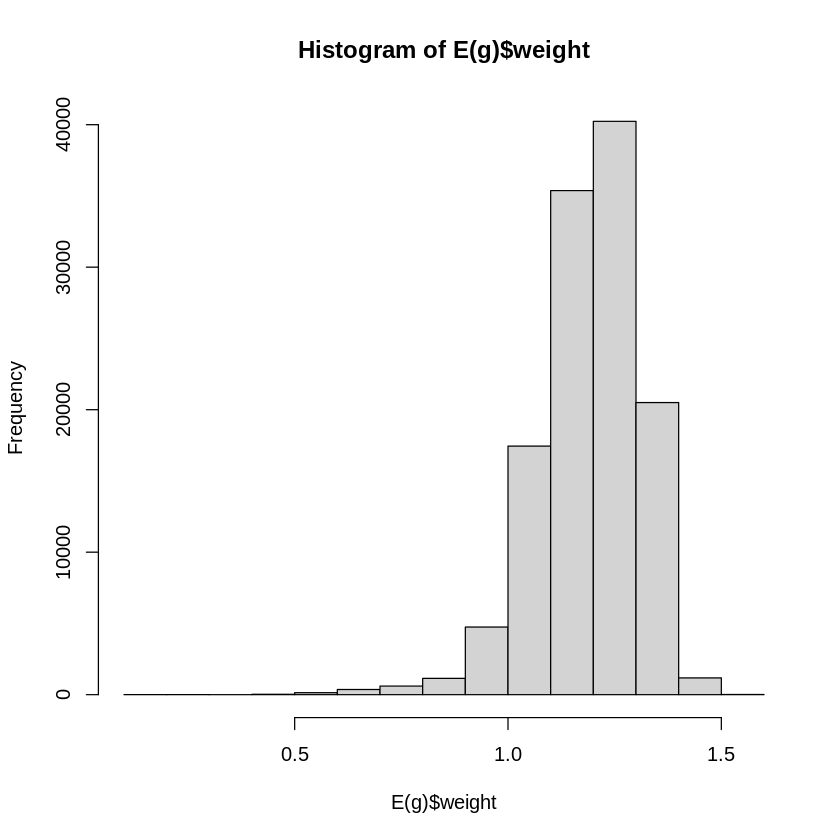

In [ ]:
hist(E(g)$weight)

# Question 3

In [ ]:
# extract the MST of the correlation graph
  # plot the MST
      # color-code the nodes based on sectors

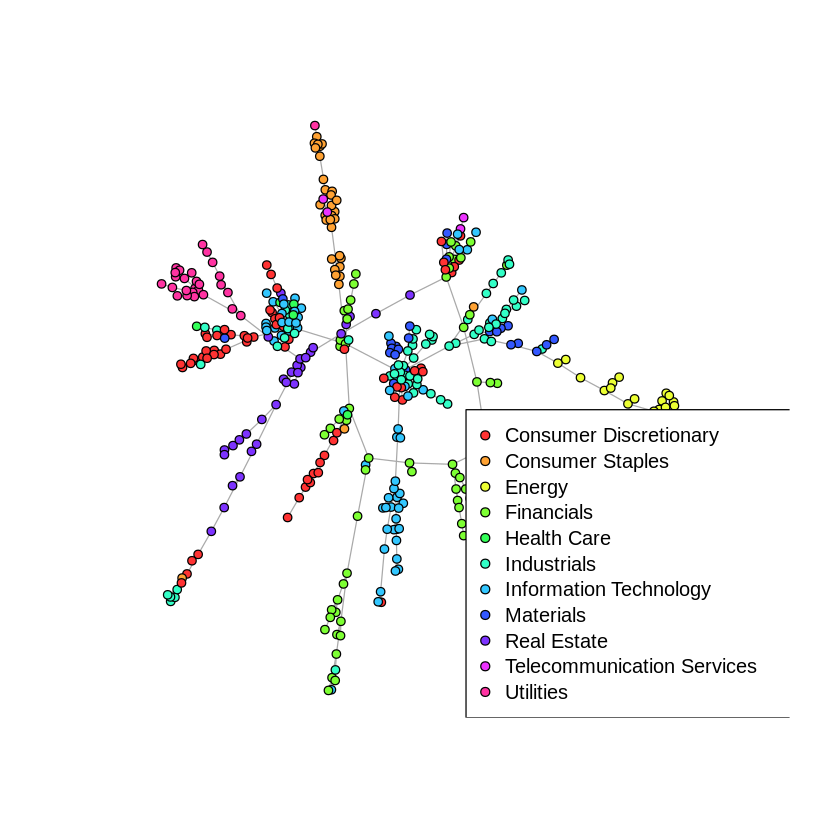

In [ ]:
mst_g <- mst(g) #use the mst function  
colbar <- rainbow(num_sector,s = 0.8, v = 1)
plot(mst_g, vertex.size=3, vertex.label=NA, vertex.color=colbar[sectors.index])
legend('bottomright',legend=levels(sector.set),pch=21, pt.bg=colbar)

# Question 4

In [ ]:
# run a community detection alg (walktrap) on the MST
# plot the communities formed

# compute homogeneity
# compute clustering
    # use clevr lib to compute homog and completeness

[1] 33

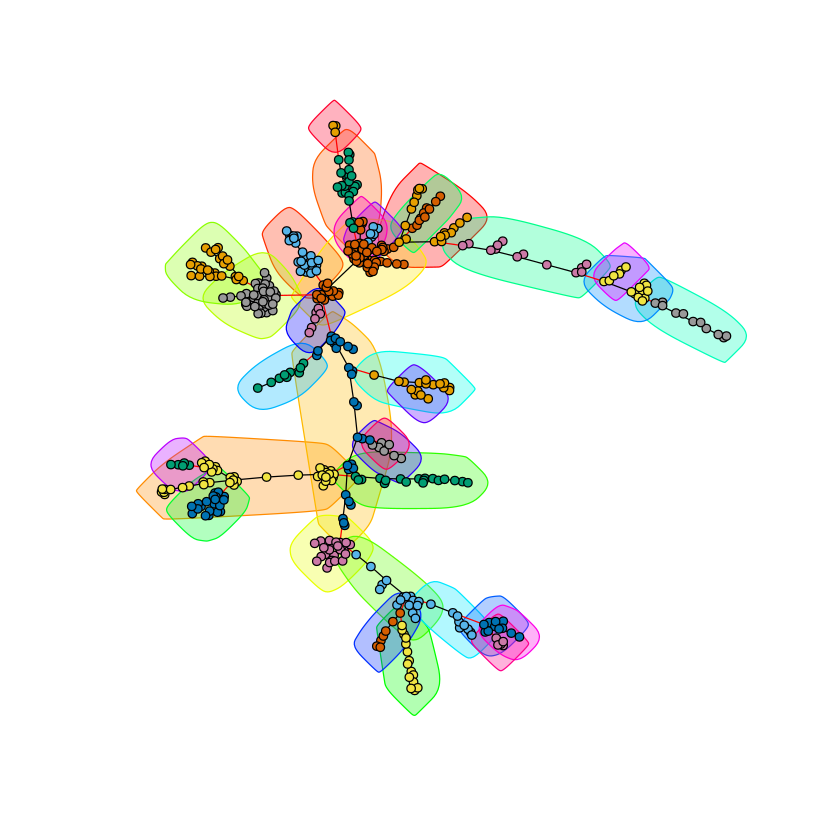

In [ ]:
#cluster
wc_daily <- cluster_walktrap(mst_g) #you can use walktrap.community  
length(wc_daily)
plot(wc_daily, mst_g, vertex.size=3, vertex.label=NA, vertex.color=sectors.index)


In [ ]:
#get metrics
true<- c(sectors.index)
pred <- c(wc_daily$membership)
homogeneity(true, pred)
completeness(true,pred)

[1] 0.6826446

[1] 0.4792845

# Question 5

In [ ]:
uniqueSectorNames = unique(sectors.names)
Si <- c()
for(i in c(1:num_sector)){
  #Si stores the number of members in sector i
  # for each sector, count the number of companies in it
  Si[i] = length(which(sectors.names==uniqueSectorNames[i]))
  print(sprintf("%s: %s", uniqueSectorNames[i], Si[i]))
}
Si

[1] "Health Care: 60"
[1] "Industrials: 64"
[1] "Consumer Discretionary: 84"
[1] "Information Technology: 66"
[1] "Consumer Staples: 36"
[1] "Utilities: 28"
[1] "Financials: 63"
[1] "Real Estate: 31"
[1] "Materials: 24"
[1] "Energy: 34"
[1] "Telecommunication Services: 4"


[1] 60 64 84 66 36 28 63 31 24 34  4

In [ ]:
# find alpha for 
p_method_1 = c()
p_method_2 = c()
for(v in c(1:vcount(mst_g))){ # for every vertex in mst_g

    current_sector = sectors.index[v]

    #N_i is the number of neighbors of v 
      # get all the neighbors of v
      # calculate the length
    neighbors_of_v = neighbors(mst_g, v)
    N_i=length(neighbors_of_v)

    #Q_i is the number of neighbors of v which belong to the same sector as v 
    Q_i = 0
    for(i in neighbors_of_v){
      if(sectors.index[i] == current_sector){
        Q_i=Q_i+1
      }
    }

    p_method_1[v] = Q_i/N_i 
    p_method_2[v] = Si[which(uniqueSectorNames==sectors.names[v])]/vcount(mst_g)
}
alpha_1 = sum(p_method_1)/vcount(mst_g)
print(sprintf("Alpha value for method 1 is: %s",alpha_1))
alpha_2 = sum(p_method_2)/vcount(mst_g)
print(sprintf("Alpha value for method 2 is: %s",alpha_2))

[1] "Alpha value for method 1 is: 0.828930077530676"
[1] "Alpha value for method 2 is: 0.114188070612533"


# Question 6

In [ ]:
# q2 weekly
file <- read.table(paste("finance_data/data/",file.names[1],sep = ""),header=TRUE, sep=",", stringsAsFactors=FALSE)
Date_data<- file$Date
weekdays_data <-weekdays(as.Date(Date_data)) #this gives weekday name 

In [ ]:
allMondaysIndex = which(weekdays_data=="Monday")

In [ ]:
allMondaysIndex

[1]   3   8  13  22  27  32  37  42  46  51  56  61  66  71  76  81  90  95
 [19] 100 105 110 115 120 125 130 135 140 145 149 154 159 164 168 172 177 186
 [37] 191 196 205 210 215 220 225 230 234 239 244 249 254 259 264 273 278 283
 [55] 288 293 297 302 307 312 317 322 327 332 337 346 351 356 361 366 371 376
 [73] 381 386 391 396 400 405 410 415 419 423 428 437 442 447 456 461 466 471
 [91] 476 480 485 490 495 500 505 510 515 520 529 534 539 544 553 558 563 568
[109] 573 578 583 588 597 602 607 612 617 622 627 632 637 642 647 651 656 661
[127] 666 679 688 693 698 703 712 717 722 727 732 737 742 746 751 756 761

In [ ]:
num_col_mondays=length(allMondaysIndex)

In [ ]:
weekly_m_m <-matrix(,nrow=com_num,ncol=num_col_mondays)
i=1
for(mondayIndex in allMondaysIndex){
  weekly_m_m[,i] = m[,mondayIndex]
  i=i+1
}

In [ ]:
weekly_m_m # all data where the day of the week is monday

55.33000,56.41000,54.97000,56.89,59.28000,58.32000,58.11,57.44000,58.12,56.82000,⋯,51.25,52.45,53.15,53.24,53.20,52.72,53.46,54.44,55.80,56.32
36.60000,39.39000,38.57000,41.22,43.59000,41.06000,44.36,42.96000,40.10,42.98000,⋯,45.31,42.37,41.70,41.74,42.45,42.32,44.23,46.44,42.08,44.94
121.03000,125.25000,122.80000,124.47,127.71000,125.01000,130.67,134.92000,134.00,134.81000,⋯,154.25,154.35,152.44,147.80,145.50,142.84,140.84,147.10,140.53,146.97
600.95998,592.83002,604.59002,628.65,93.70000,92.20000,90.83,92.93000,95.97,96.45000,⋯,139.34,139.20,141.46,140.88,143.70,143.17,141.83,143.64,146.58,153.01
51.36000,52.37000,54.11000,54.15,53.84000,54.00000,53.75,56.44000,57.40,54.85000,⋯,63.55,65.85,65.80,66.10,65.03,64.97,64.31,64.66,66.48,66.21
65.10000,66.67000,69.42000,73.21,72.34000,71.52000,72.48,72.66000,73.01,73.10000,⋯,89.99,89.14,86.91,87.48,87.33,88.44,86.64,80.94,82.49,86.59
38.84000,39.27000,39.63000,39.80,40.13000,39.90000,40.73,40.90000,41.51,41.82000,⋯,45.13,45.53,44.98,44.70,44.47,43.59,43.31,44.13,43.48,44.68
79.00000,79.19000,79.56000,81.27,84.26000,82.82000,82.67,80.84000,81.05,79.46000,⋯,123.24,124.04,124.39,119.39,117.64,117.84,115.72,119.36,121.25,121.11
61.44000,60.70000,62.20000,64.64,66.93000,67.62000,72.89,72.36000,72.68,72.88000,⋯,120.15,121.80,126.31,128.25,129.59,130.16,129.99,132.89,135.11,135.12
51.18000,52.23000,51.98000,52.37,55.31000,55.50000,54.52,54.07000,54.66,53.85000,⋯,83.85,82.76,82.90,81.40,81.24,79.33,76.39,79.22,76.22,76.38
43.41000,44.67000,43.89000,44.85,45.14000,44.22000,44.98,44.11000,46.50,48.07000,⋯,44.76,44.70,44.85,45.35,45.80,44.99,44.68,45.38,45.73,42.96


In [ ]:
week_m_cor <- cal_cor(weekly_m_m)

In [ ]:
dim(weekly_m_m)[2]

[1] 143

In [ ]:
cal_cor<-function(comp_date){
  r_mat=matrix(0,nrow=com_num, ncol=dim(comp_date)[2]-1) # matrix of log normalized returns

  for(i in 1:com_num){
    p = comp_date[i,] # list of closing price
    q = c() # list of return of stock
    r = c() # list of log reutn of stock

    for(t in c(2:length(p))){
      q[t-1]=(p[t]-p[t-1])/p[t-1]    
    }
    r=log(1+q)
    r_mat[i,]=r
  }

  w_mat = matrix(0,nrow=com_num, ncol=com_num)
  for(i in c(1:com_num-1)){
    for(j in c((i+1):com_num)){
      r_i = mean(r_mat[i,])
      r_j = mean(r_mat[j,])
      r_ij = mean(r_mat[i,]*r_mat[j,])
      r_i_squared = mean(r_mat[i,]^2)
      r_j_squared = mean(r_mat[j,]^2)

      num = r_ij-(r_i*r_j)
      den = sqrt((r_i_squared-(r_i^2))*(r_j_squared-(r_j^2)))
      p_ij = num/den
      w_ij = sqrt(2*(1-p_ij))

      w_mat[i,j]=w_ij
    }
  }


  return(w_mat)
}

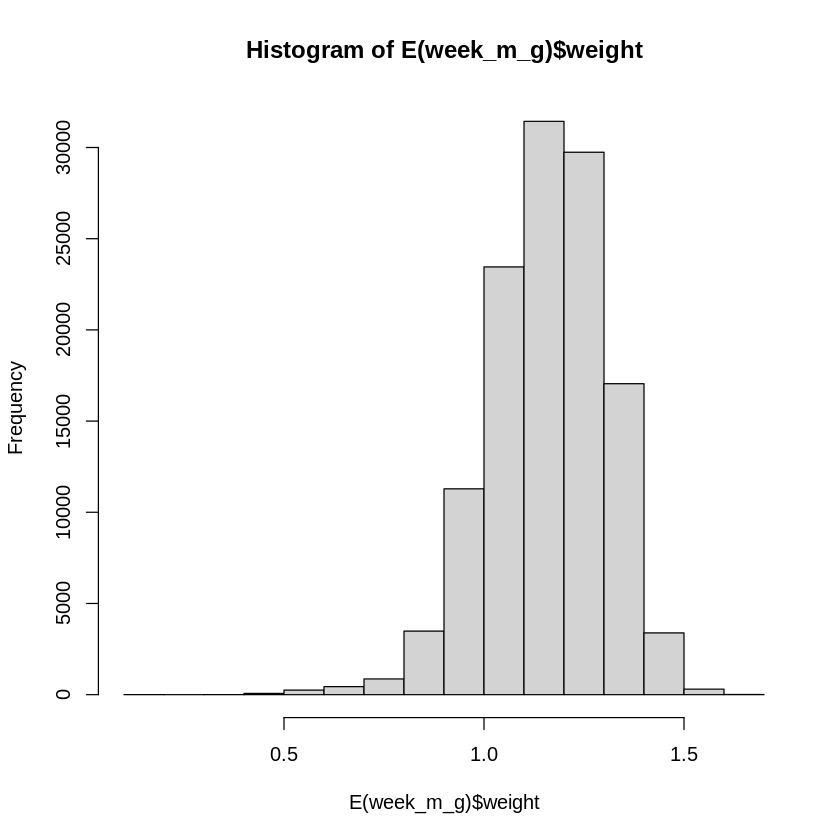

In [ ]:
week_m_cor <- cal_cor(weekly_m_m)
week_m_g<-graph_from_adjacency_matrix(week_m_cor, mode ="upper", weighted = TRUE, diag = TRUE, add.colnames = NULL, add.rownames = NA)

hist(E(week_m_g)$weight)


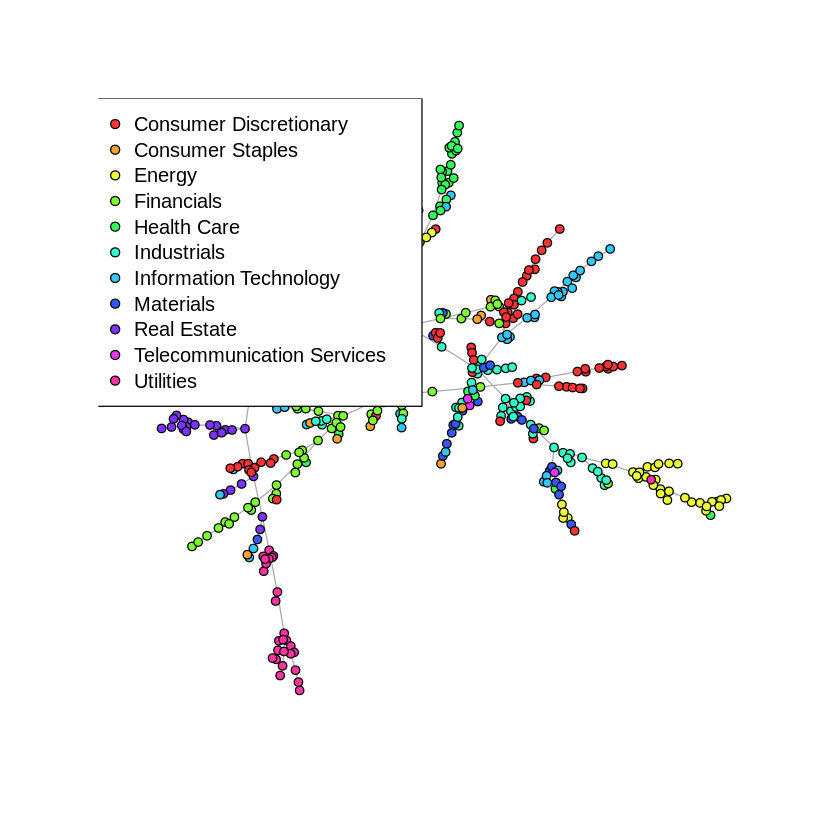

In [ ]:
# q3 weekly
mst_week_m <- mst(week_m_g) #use the mst function
colbar <- rainbow(num_sector,s = 0.8, v = 1)
plot(mst_week_m, vertex.size=3, vertex.label=NA, vertex.color=colbar[sectors.index])
legend('topleft',legend=levels(sector.set),pch=21, pt.bg=colbar)

[1] 42

[1] 0.582007

[1] 0.3907714

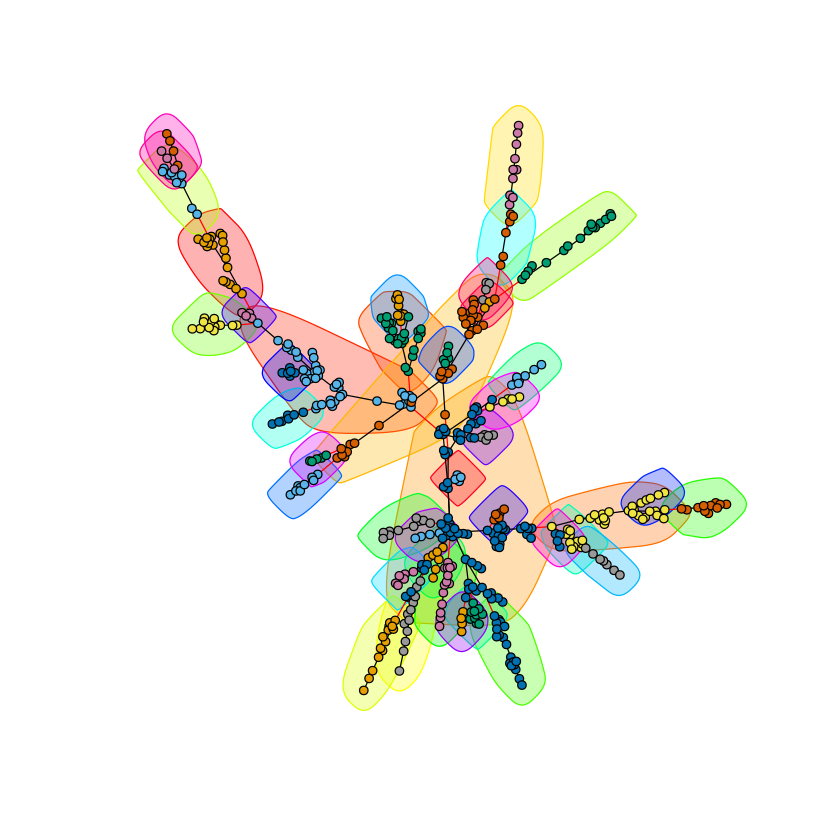

In [ ]:
# q4 weekly
#cluster
wc_weekly <- cluster_walktrap(mst_week_m) #you can use walktrap.community. ensure that same algo is used for daily, monthly, weekly
length(wc_weekly)
plot(wc_weekly, mst_week_m, vertex.size=3, vertex.label=NA, vertex.color=sectors.index)

#get metrics
true<- c(sectors.index)
pred <- c(wc_weekly$membership)
homogeneity(true, pred)
completeness(true,pred)

In [ ]:
# q5 weekly
uniqueSectorNames = unique(sectors.names)
Si <- c()
for(i in c(1:num_sector)){
  #Si stores the number of members in sector i
  # for each sector, count the number of companies in it
  Si[i] = length(which(sectors.names==uniqueSectorNames[i]))
  print(sprintf("%s: %s", uniqueSectorNames[i], Si[i]))
}
Si

In [ ]:
# find alpha for 
p_method_1 = c()
p_method_2 = c()
for(v in c(1:vcount(mst_week_m))){ # for every vertex in mst_g

    current_sector = sectors.index[v]

    #N_i is the number of neighbors of v 
      # get all the neighbors of v
      # calculate the length
    neighbors_of_v = neighbors(mst_week_m, v)
    N_i=length(neighbors_of_v)

    #Q_i is the number of neighbors of v which belong to the same sector as v 
    Q_i = 0
    for(i in neighbors_of_v){
      if(sectors.index[i] == current_sector){
        Q_i=Q_i+1
      }
    }

    p_method_1[v] = Q_i/N_i 
    p_method_2[v] = Si[which(uniqueSectorNames==sectors.names[v])]/vcount(mst_week_m)
}
alpha_1 = sum(p_method_1)/vcount(mst_week_m)
print(sprintf("Alpha value for method 1 is: %s",alpha_1))
alpha_2 = sum(p_method_2)/vcount(mst_week_m)
print(sprintf("Alpha value for method 2 is: %s",alpha_2))

[1] "Alpha value for method 1 is: 0.742969603495919"
[1] "Alpha value for method 2 is: 0.114188070612533"


# Question 7

In [ ]:
file <- read.table(paste("finance_data/data/",file.names[1],sep = ""),header=TRUE, sep=",", stringsAsFactors=FALSE)
Date_data<- as.Date(file$Date)

In [ ]:
data_15 <-format(Date_data, format="%d")

In [ ]:
all_15_Index=which(data_15=="15")

In [ ]:
num_col_15=length(all_15_Index)

In [ ]:
monthly_15_m <- matrix(,nrow=com_num,ncol=num_col_15)
i=1
for(index15 in all_15_Index){
  monthly_15_m[,i]=m[,index15]
  i=i+1
}

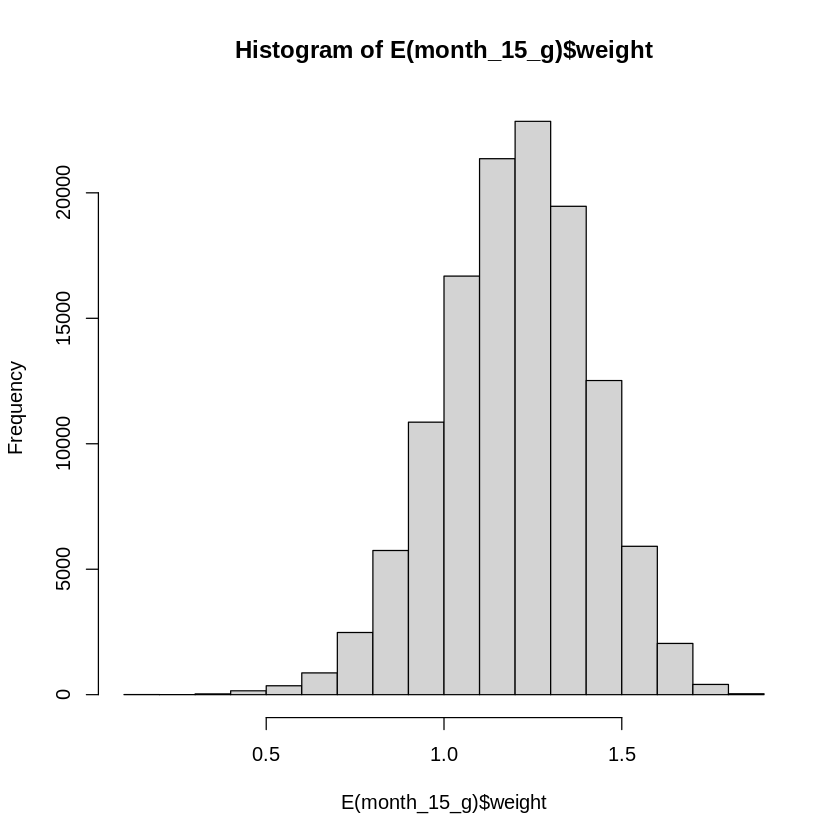

In [ ]:
# q2 monthly
monthly_15_cor <- cal_cor(monthly_15_m)

month_15_g<-graph_from_adjacency_matrix(monthly_15_cor, mode ="upper", weighted = TRUE, diag = TRUE,
  add.colnames = NULL, add.rownames = NA)

hist(E(month_15_g)$weight)


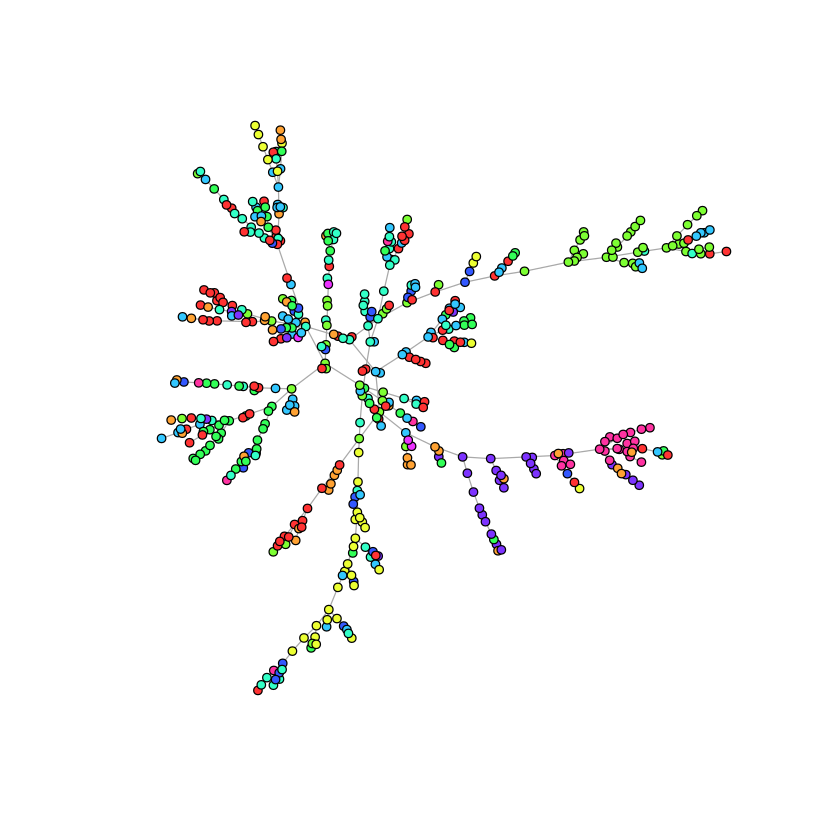

In [ ]:
# q3 monthly
mst_month_15 <- mst(month_15_g) #use the mst function
colbar <- rainbow(num_sector,s = 0.8, v = 1)
plot(mst_month_15, vertex.size=3, vertex.label=NA, vertex.color=colbar[sectors.index])
legend('topleft',legend=levels(sector.set),pch=21, pt.bg=colbar)

[1] 74

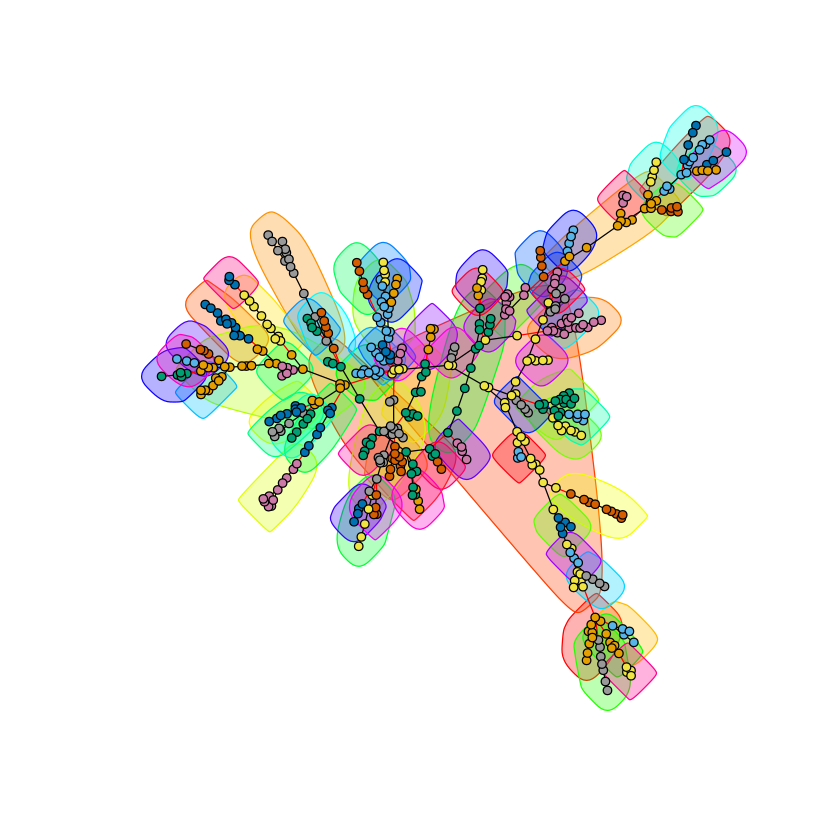

In [ ]:
# q4 monthly
#cluster
wc_monthly <- walktrap.community(mst_month_15)
length(wc_monthly)
plot(wc_monthly, mst_month_15, vertex.size=3, vertex.label=NA, vertex.color=sectors.index)


In [ ]:
# q5 monthly
#get metrics
true<- c(sectors.index)
pred <- c(wc_monthly$membership)
homogeneity(true, pred)
completeness(true,pred)

[1] 0.5095092

[1] 0.2823379

In [ ]:
# q6 monthly
uniqueSectorNames = unique(sectors.names)
Si <- c()
for(i in c(1:num_sector)){
  #Si stores the number of members in sector i
  # for each sector, count the number of companies in it
  Si[i] = length(which(sectors.names==uniqueSectorNames[i]))
  print(sprintf("%s: %s", uniqueSectorNames[i], Si[i]))
}
Si

[1] "Health Care: 60"
[1] "Industrials: 64"
[1] "Consumer Discretionary: 84"
[1] "Information Technology: 66"
[1] "Consumer Staples: 36"
[1] "Utilities: 28"
[1] "Financials: 63"
[1] "Real Estate: 31"
[1] "Materials: 24"
[1] "Energy: 34"
[1] "Telecommunication Services: 4"


[1] 60 64 84 66 36 28 63 31 24 34  4

In [ ]:
# find alpha for 
p_method_1 = c()
p_method_2 = c()
for(v in c(1:vcount(mst_month_15))){ # for every vertex in mst_g

    current_sector = sectors.index[v]

    #N_i is the number of neighbors of v 
      # get all the neighbors of v
      # calculate the length
    neighbors_of_v = neighbors(mst_month_15, v)
    N_i=length(neighbors_of_v)

    #Q_i is the number of neighbors of v which belong to the same sector as v 
    Q_i = 0
    for(i in neighbors_of_v){
      if(sectors.index[i] == current_sector){
        Q_i=Q_i+1
      }
    }

    p_method_1[v] = Q_i/N_i 
    p_method_2[v] = Si[which(uniqueSectorNames==sectors.names[v])]/vcount(mst_month_15)
}
alpha_1 = sum(p_method_1)/vcount(mst_month_15)
print(sprintf("Alpha value for method 1 is: %s",alpha_1))
alpha_2 = sum(p_method_2)/vcount(mst_month_15)
print(sprintf("Alpha value for method 2 is: %s",alpha_2))

[1] "Alpha value for method 1 is: 0.483468286099865"
[1] "Alpha value for method 2 is: 0.114188070612533"
